In [1]:
import numpy as np
import pandas as pd
import os

data_path = os.path.abspath(os.path.join("2","..", "..","..", "data", "external","word-embeddings.feather"))
data_path2 = os.path.abspath(os.path.join("2","..", "..","..", "data", "external","2d_clustering.csv"))

df_vis = pd.read_csv(data_path2)
df = pd.read_feather(data_path)  

# df_vis.drop(columns=['color'],inplace=True)
print(df_vis.head())

            x           y  color
0  516.012706  393.014514      0
1  436.211762  408.656585      0
2  512.052601  372.022014      0
3  489.140464  401.807159      0
4  446.207986  338.516682      0


In [2]:
string_array = np.array(df['vit'].tolist())  

print(string_array.shape)

(200, 512)


### Kmeans Visualization using 2d clustering dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.colors as mcolors
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
from models.Kmeans.Kmeans import Kmeans


df_analysis = df_vis.copy()
df_analysis = df_analysis.drop(columns=['color'])
visualization = df_analysis[['x', 'y']].to_numpy()

n_clusters = 3

kmeans = Kmeans(k=n_clusters)
kmeans.fit(visualization)

assginments = kmeans.labels
# print(assginments)

# print(np.sum(abs(assginments - df_vis['color']))) 

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(df_analysis['x'], df_analysis['y'], c='grey', cmap='viridis')
centroid_scatter = ax.scatter([], [], c='red', marker='x', s=100)

cmap = plt.get_cmap('viridis', n_clusters)
norm = mcolors.Normalize(vmin=0, vmax=n_clusters-1)

def update(frame):
    if frame < len(kmeans.history_labels):
        labels = kmeans.history_labels[frame]
        centroids = kmeans.history_centroids[frame]

        scatter.set_color(cmap(norm(labels)))
        centroid_scatter.set_offsets(centroids)

        ax.set_title(f" Iteration {frame + 1}")
    return scatter, centroid_scatter

total_frames = len(kmeans.history_labels)
ani = FuncAnimation(fig, update, frames=total_frames, interval=1000, repeat=False)

plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(scatter, label='Cluster', ticks=range(n_clusters))
plt.tight_layout()

writer = PillowWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
ani.save('plots/kmeans_clustering.gif', writer=writer)

plt.close(fig)

/tmp/ipykernel_137029/1502509188.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(df_analysis['x'], df_analysis['y'], c='grey', cmap='viridis')


### Elbow Method Test for 2d dataset


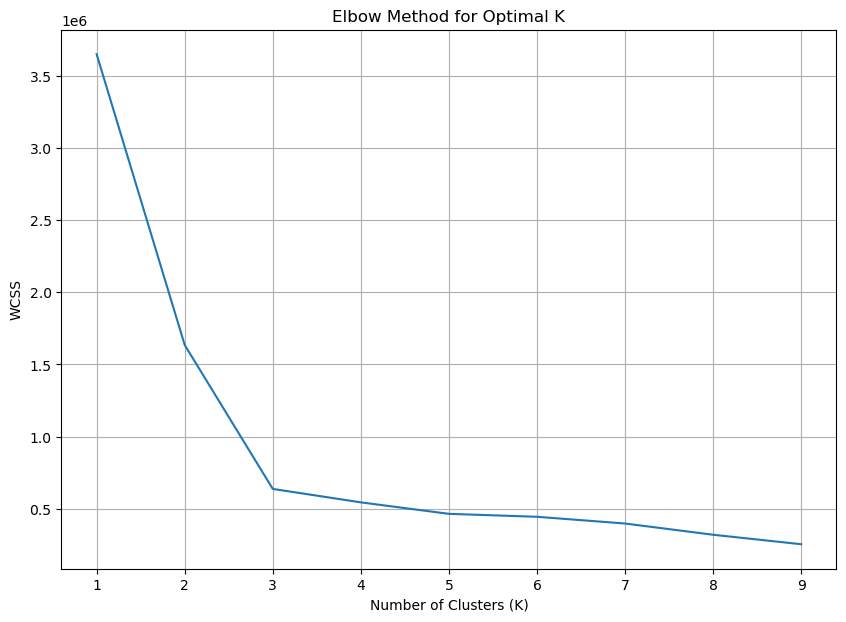

In [4]:
wcss = []

k_range = range(1, 10)
for k in k_range:
    kmeans = Kmeans(k=k)
    kmeans.fit(visualization)
    wcss.append(kmeans.cost)
    


plt.figure(figsize=(10, 7))
plt.plot(k_range, wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('plots/3_visualization_data_elbow.png')
plt.show()

### Kmeans on the dataset ###

In [5]:
n_clusters = 3

kmeans = Kmeans(k=n_clusters)
kmeans.fit(string_array)

cluster_assignments = kmeans.labels

### Elbow method on the dataset

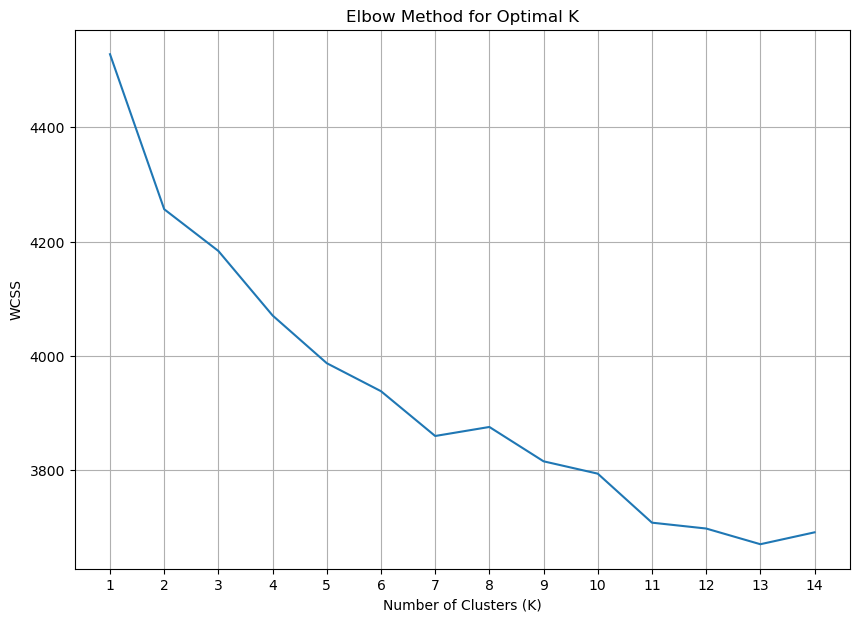

In [6]:
wcss = []

k_range = range(1, 15)
for k in k_range:
    kmeans = Kmeans(k=k)
    kmeans.fit(string_array)
    wcss.append(kmeans.cost)

plt.figure(figsize=(10, 7))
plt.plot(k_range, wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('plots/3_main_kmeans_data_elbow.png')
plt.show()

optimal_k = 5
kmeans = Kmeans(k=optimal_k, random_state=42)
kmeans.fit(string_array)

#final cluster assignments using kmeans1
final_cluster_assignments = kmeans.labels

kmeans1 = optimal_k #from the elbow method